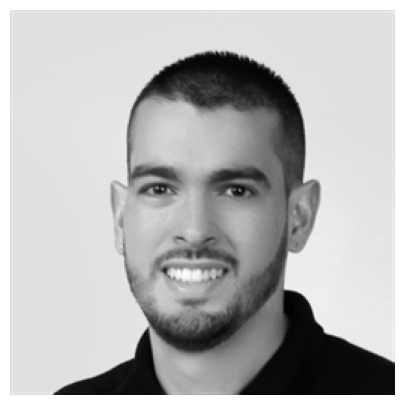

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

# path to photos
classmates_photos = "../classmates_photos"

# Load my photo
my_photo = Image.open(f"{classmates_photos}/Imagen5.png")

# Resize and convert to grayscale
my_photo = my_photo.resize((256, 256)).convert("L")

# Plot my_photo
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(my_photo, cmap="gray")
plt.show()

This is the average face of the cohort:


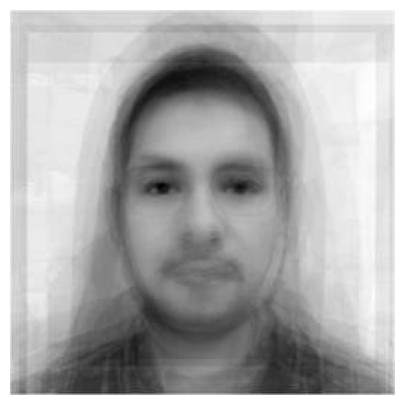

Distance of my face from average face of the cohort is: 39768.725589337155


In [2]:
# Set all images in directory classmates_photos
files = os.listdir(classmates_photos)
cohort = []
for i in files:
    if not i.endswith(".DS_Store"):
        cohort.append(f'{classmates_photos}/{i}')

# Create folder classmates_photos_gray
classmates_photos_gray = "../classmates_photos_gray"
if not os.path.exists(classmates_photos_gray):
    os.makedirs(classmates_photos_gray)

# Load images from classmates_photos, resize to 256x256, convert to grayscale and save in classmates_photos_gray
imgs_arr = []
for j, path in enumerate(cohort):
    img = Image.open(path).resize((256, 256)).convert("L")
    img.save(f'{classmates_photos_gray}/{j}.jpg')
    imgs_arr.append(np.array(img))

# Set all images in directory classmates_photos_gray
files = os.listdir(classmates_photos_gray)
imgs_gray = []
for k in files:
    if not k.endswith(".DS_Store"):
        imgs_gray.append(f'{classmates_photos_gray}/{k}')

# get dimensions of any image
w,h=Image.open(imgs_gray[0]).size
N=len(imgs_gray)

# Create a numpy array of floats
arr=np.zeros((h,w), np.float64)

# Calculate average faces
for im in imgs_gray:
    imarr = np.array(Image.open(im),dtype=np.float64)
    arr = arr+(imarr/N)

# Round values in array and cast as 8-bit integer
avg_face = np.array(np.round(arr),dtype=np.uint8)

# Save result as Average.jpg in classmates_photos_gray and plot image
Image.fromarray(avg_face).save(f'{classmates_photos_gray}/Average.jpg') ###############
average = Image.open(f'{classmates_photos_gray}/Average.jpg')
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(average, cmap="gray")
print("This is the average face of the cohort:")
plt.show()

# Calculate and print distance between my_photo and Average
dist = np.linalg.norm(np.array(my_photo) - avg_face)
print(f"Distance of my face from average face of the cohort is: {dist}")

### How would you measure it?
With the **euclidean distance** using the `numpy.linalg.norm` method. This method uses by default the **Frobenius norm**, which is equivalent to the Euclidean norm in matrix space.